# Проектная работа по модулю “Математика и статистика в Python

1. Загрузить файл hr.csv.

2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

3. Рассчитать и визуализировать корреляционную матрицу для переменных.

4. Визуализировать несколько взаимосвязей между переменными.

5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

6. Рассчитать сколько работников работает в каждом департаменте.

7. Показать распределение сотрудников по зарплатам.

8. Показать распределение сотрудников по зарплатам совместно с департаментами.

9. Сколько сотрудников покинули компанию.

10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

11. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 1. Загрузить файл hr.csv.

In [5]:
url="hr.csv"
data=pd.read_csv(url)
data[:3]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред.отклонение)

In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [6]:
data['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [7]:
data['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

**Перечень переменных:**
1. satisfaction_level - уровень удовлетворенности работником работой в компании;
2. last evaluation - последняя оценка работником работы в компании;
3. number project - номер проекта - (количество проектов);
4. average montly hours - сколько времени работник проводит на работе (средне месячное время);
5. time spend company - время нахождения на рабочем месте;
6. Work accident - несчастные случаи на работе;
7. left - покидать, увольняться (если уволился, то left=1);
8. promotion last 5years - продвижение по должности за последние 5 лет;
9. sales - продажи по продуктам (департаменты - 'sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT', 'product_mng', 'marketing', 'RandD');
10. salary - зарплата ('low', 'medium', 'high').

# 3. Рассчитать и визуализировать корреляционную матрицу для переменных

In [51]:
data.corr().round(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000,0.105,-0.143,-0.020,-0.101,0.059,-0.388,0.026
last_evaluation,0.105,1.000,0.349,0.340,0.132,-0.007,0.007,-0.009
number_project,-0.143,0.349,1.000,0.417,0.197,-0.005,0.024,-0.006
average_montly_hours,-0.020,0.340,0.417,1.000,0.128,-0.010,0.071,-0.004
time_spend_company,-0.101,0.132,0.197,0.128,1.000,0.002,0.145,0.067
Work_accident,0.059,-0.007,-0.005,-0.010,0.002,1.000,-0.155,0.039
left,-0.388,0.007,0.024,0.071,0.145,-0.155,1.000,-0.062
promotion_last_5years,0.026,-0.009,-0.006,-0.004,0.067,0.039,-0.062,1.000


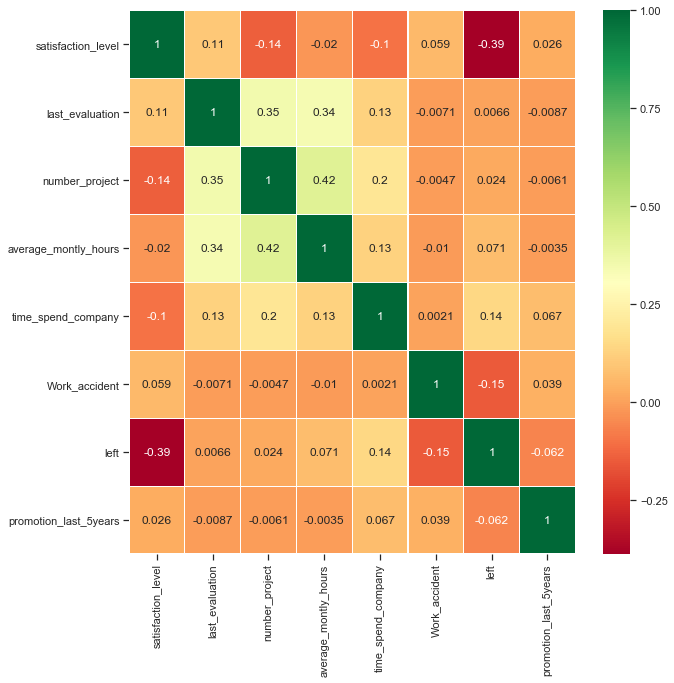

In [56]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

**Корреляционная матрица показывает наличие случайной линейной связи между факторами. Для данных data установлено:**

- наибольшая положительная корреляционная связь (0.42) установлена между факторами: 'number project' и 'average_montly_hours';
- наименьшая положительная корреляционная связь (0.0021) установлена между факторами: 'Work accident' и 'time spend company';

- наибольшая отрицательная корреляционная связь (-0.39) установлена между факторами: 'left' и 'satisfaction_level';
- наименьшая отрицательная корреляционная связь (-0.0035) установлена между факторами: 'promotion last 5years' и 'average_montly_hours'.

# 4. Визуализировать несколько взаимосвязей между переменными

**1. Построим попарные графики для выборок, а также частотные графики на главной диагонали  с помощью метода pairplot**

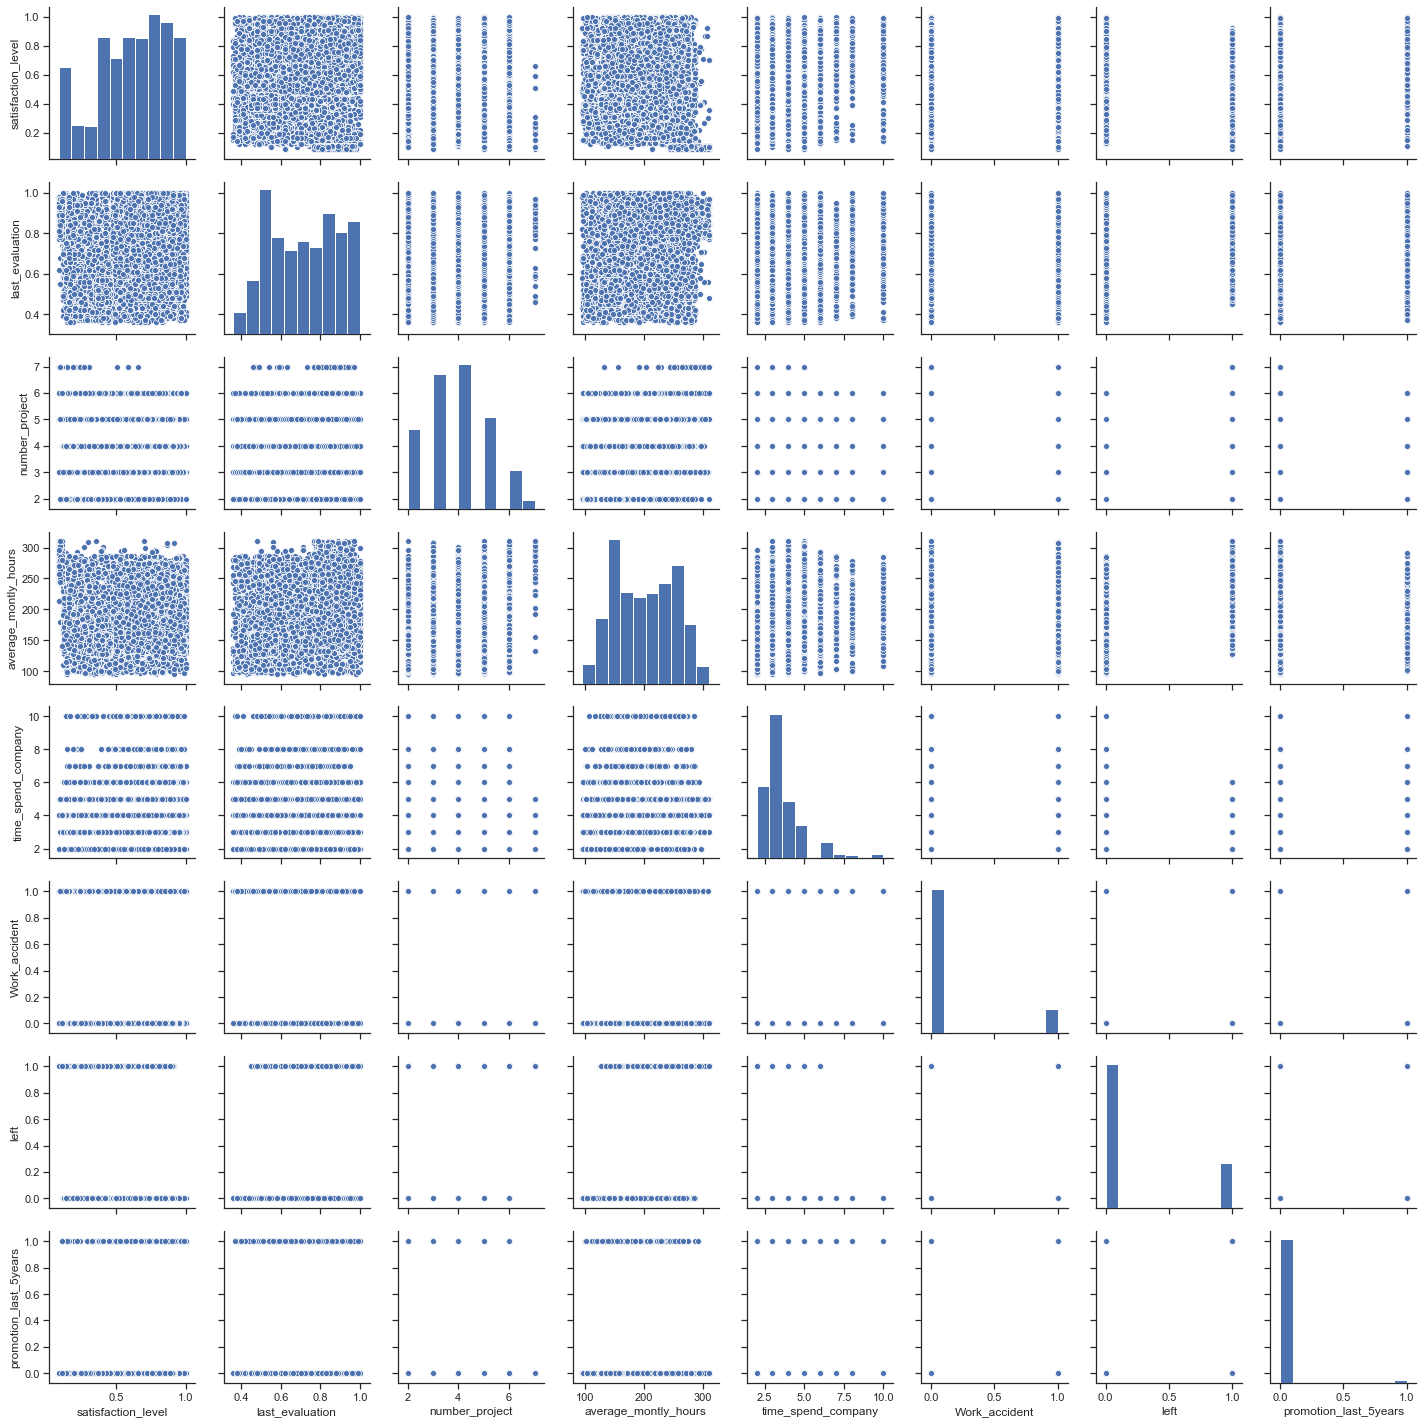

In [15]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data)

**2. Проведем классификационный анализ всех выборок попарно с помощью параметра hue, где мы указываем наименование департаментов**

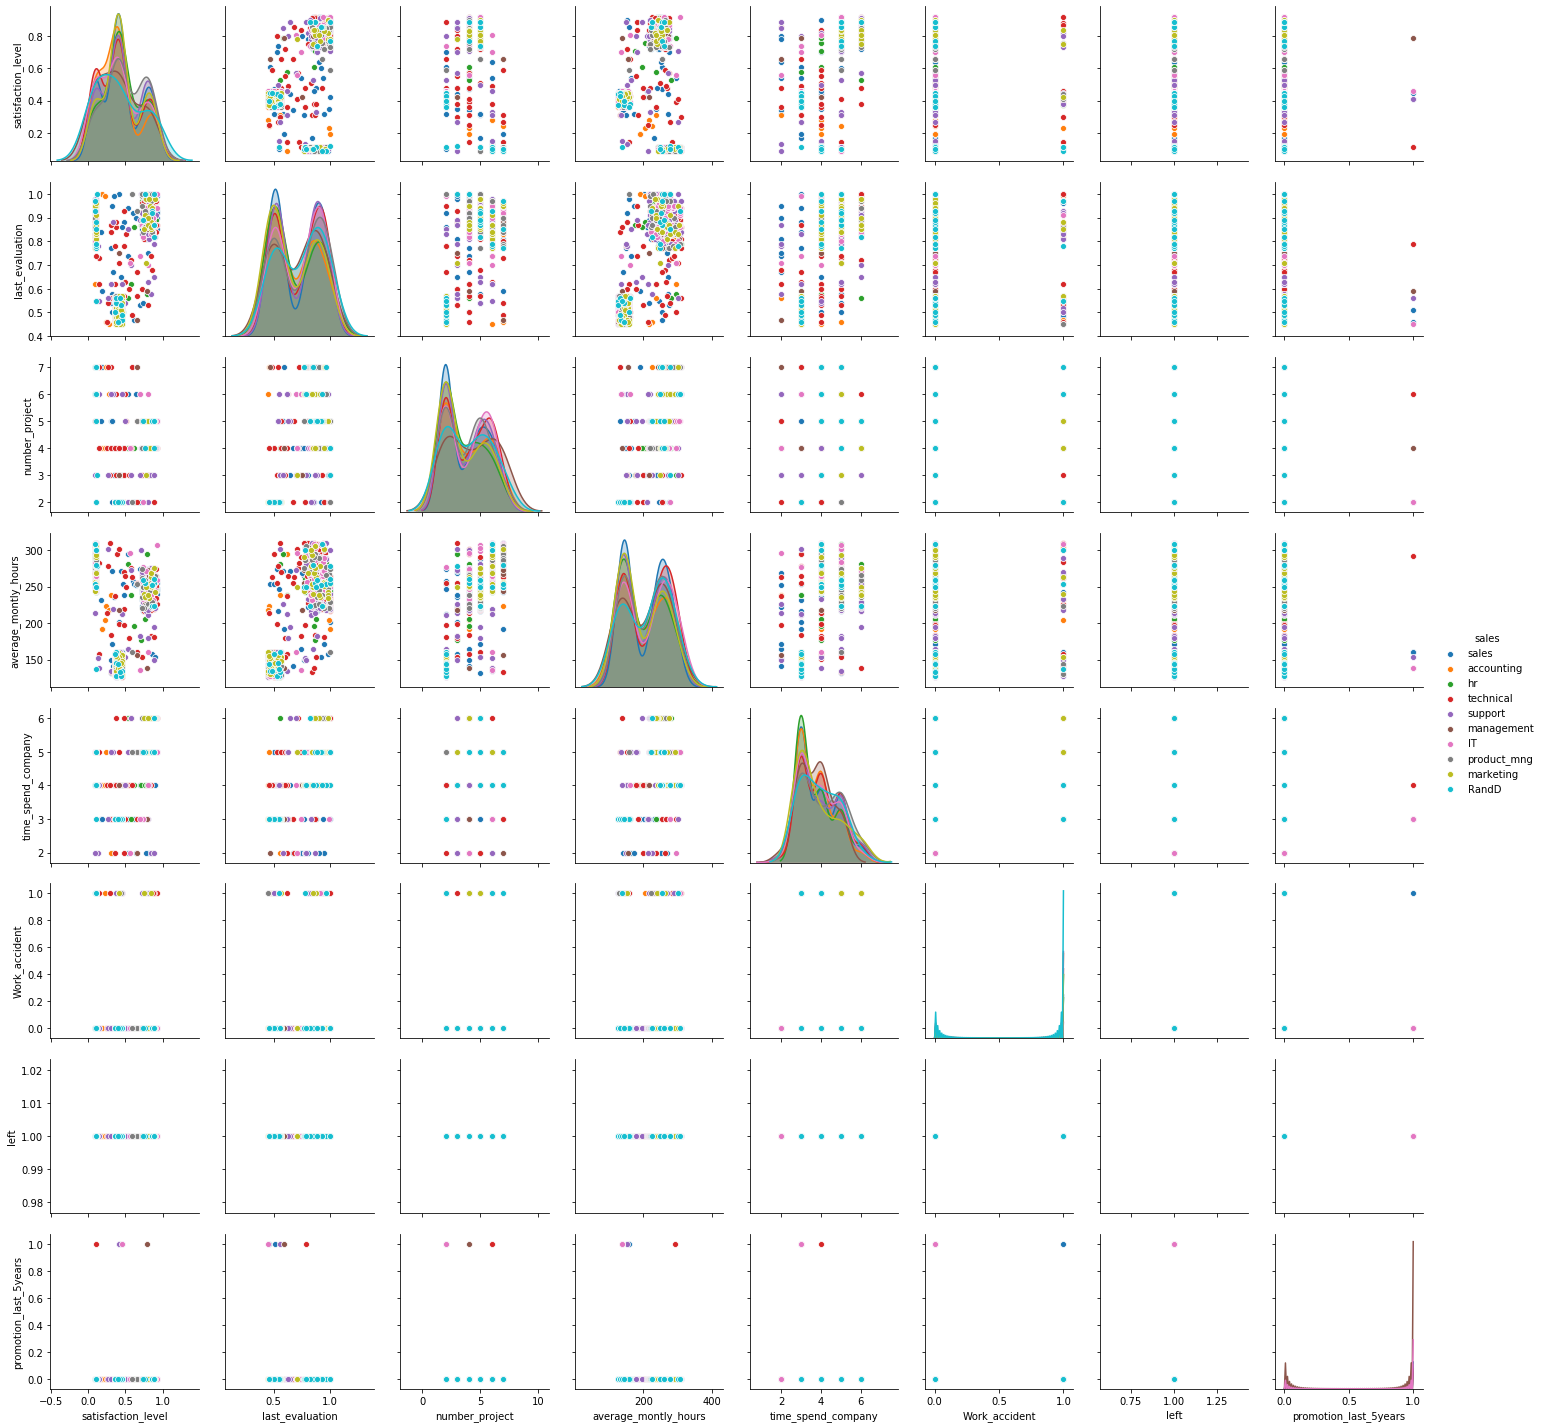

In [166]:
dat=data.head(1000)
fig = sns.pairplot(data=dat, hue='sales')
plt.show()

**3. Произведем классификацию по уровням зарплаты сотрудников**

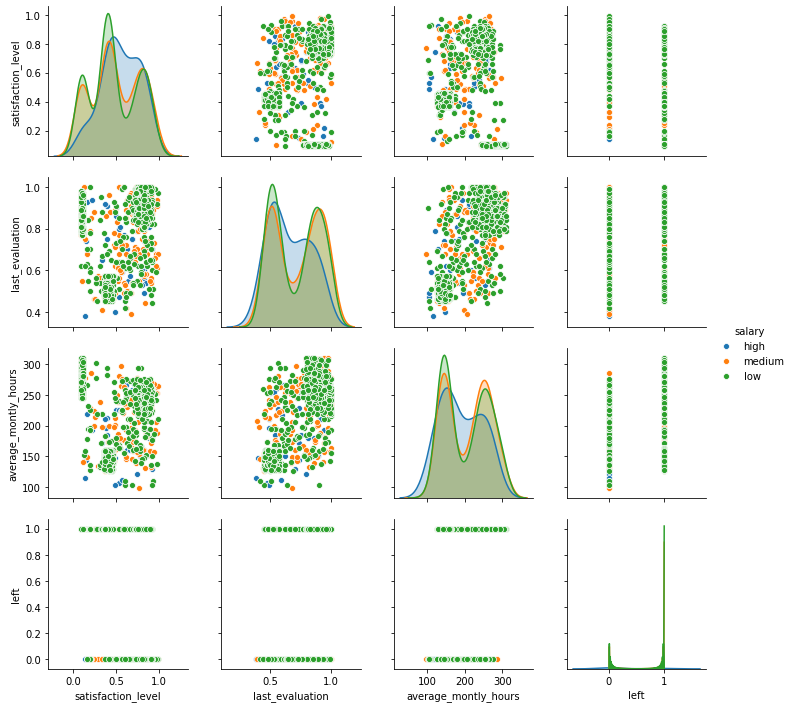

In [167]:
dat=data[['satisfaction_level','last_evaluation','average_montly_hours','left','salary','sales']].tail(1000)
fig = sns.pairplot(data=dat, hue='salary')
plt.show()

Низкий уровень зарплат - бросается в глаза)))

# 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

**Одновыборочный t-критерий**

- t-test используют для определения, насколько среднее исследуемых данных статистически отличается от среднего значения генеральной совокупности. 
- Исследуем данные: X =data[data['sales']=='support']['satisfaction_level'].
- Генеральная совокупность: Y = data['satisfaction_level'].
- Рассматривая две выборки  𝑋 и Y , мы хотим сравнить их средние значения. Тогда рассматривается нулевая гипотеза о том, что выборочные средние значения равны (𝐻0: 𝜇X = 𝜇Y) и альтернативная о том, что выборочные средние различны (𝐻1 :𝜇X ≠ 𝜇Y).

In [143]:
sales_support = data[data['sales']=='support']['satisfaction_level']
stats.ttest_1samp(sales_support, data['satisfaction_level'].mean())

Ttest_1sampResult(statistic=1.047336893292001, pvalue=0.2950578291383667)

- t-значение равно 1.047, и в одновыборочном критерии мы оцениваем p-value.
- p-value равно 0.29, что намного больше стандартной альфа ошибки 0.05, поэтому мы не можем отвергнуть нулевую гипотезу о том, что среднее значения идентичны. И можем сказать, что не имеется статистическое различие между мнением сотрудников 'support' по вопросу 'satisfaction_level' и генеральной совокупности 'satisfaction_level' в целом.
- Если мы построим график вероятности выборки и генеральной совокупности, то можно убедиться, что это действительно так - плотности распределения практически совпадают.

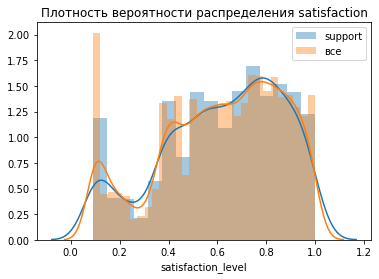

In [16]:
sales_support = data[data['sales']=='support']['satisfaction_level']
satisfaction = data['satisfaction_level']
sns.distplot(sales_support)
sns.distplot(satisfaction)
plt.title('Плотность вероятности распределения satisfaction')
plt.legend(['support', 'все'])
plt.show()

**Двухвыборочный t-критерий для независимых выборок**

- Необходимо проверить по выборочным данным нулевую гипотезу равенства математических ожиданий случайных величин (𝐻0: 𝜇X = 𝜇Y)
- В двухвыборочном t-критерии t-значение отражает различия между выборками. Чем выше t, тем более различны случайные величины между собой. Чем меньше t, тем более они похожи.

In [18]:
sales_support = data[data['sales']=='support']['satisfaction_level']
sales_marketing = data[data['sales']=='marketing']['satisfaction_level']
stats.ttest_ind(sales_marketing,sales_support)

Ttest_indResult(statistic=0.030550021644610056, pvalue=0.9756303766306269)

- t-значение равно 0.03, p-value равно 0.97, что намного больше стандартной альфа ошибки 0.05, поэтому мы принимаем нулевую гипотезу и можем сказать, что не имеется статистическое различие между мнениями сотрудников департаментов 'support' и 'marketing' по вопросу 'satisfaction_level' в целом.
- Графики плотности распределения выборок этих случайных величин практически совпадают:

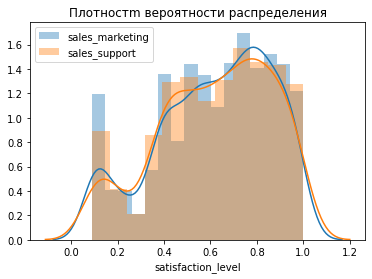

In [20]:
sns.distplot(sales_support)
sns.distplot(sales_marketing)
plt.title('Плотностm вероятности распределения')
plt.legend(['sales_marketing', 'sales_support'])
plt.show()

## 6. Рассчитать сколько работников работает в каждом департаменте

**Общее количество работников - 14999 человек в десяти департаментах**

In [22]:
len(data)

14999

In [21]:
data['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [7]:
depart = ['sales', 'accounting', 'hr', 'technical', 'support', 'management',
          'IT', 'product_mng', 'marketing', 'RandD']

In [62]:
print('Количество работников по департаментам:')
for dep in depart:
    print(len(data[data['sales'] == dep]), "- департамент",dep)
    len(data[data['sales'] == dep])

Количество работников по департаментам:
4140 - департамент sales
767 - департамент accounting
739 - департамент hr
2720 - департамент technical
2229 - департамент support
630 - департамент management
1227 - департамент IT
902 - департамент product_mng
858 - департамент marketing
787 - департамент RandD


Распределение работников по департаментам
Всего работников: 14999


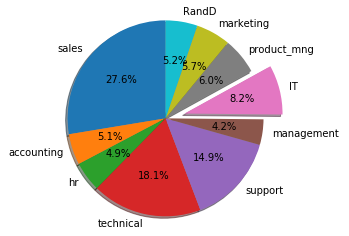

In [83]:
print('Распределение работников по департаментам')
labels = 'sales', 'accounting', 'hr', 'technical', 'support', 'management','IT', 'product_mng', 'marketing', 'RandD'
sizes = [4140, 767, 739, 2720, 2229, 630, 1227, 902, 858, 787]
print('Всего работников:',sum(sizes))
explode = (0,0,0,0,0,0,0.2,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')                  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# 7. Показать распределение сотрудников по зарплатам

**Уровни зарплат сотрудников:**

In [31]:
data['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [33]:
print('Распределение по уровню зарплат сотрудников:')
for sal in ['low', 'medium', 'high']:
    print('Зарплата ',sal, '-',len(data[data['salary']== sal]),'сотрудников')

Распределение по уровню зарплат сотрудников:
Зарплата  low - 7316 сотрудников
Зарплата  medium - 6446 сотрудников
Зарплата  high - 1237 сотрудников


Распределение сотрудников по зарплатам


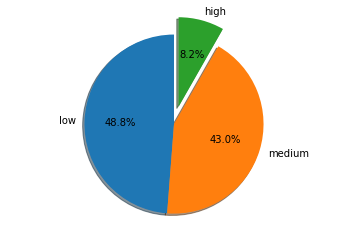

In [44]:
print('Распределение сотрудников по зарплатам')
labels = 'low', 'medium', 'high'
sizes = [7316, 6446, 1237]
explode = (0, 0, 0.2)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')      # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# 8. Показать распределение сотрудников по зарплатам совместно с департаментами

распределение сотрудников по зарплатам в департаменте sales
low 2099
medium 1772
high 269


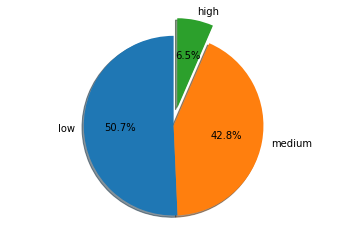

распределение сотрудников по зарплатам в департаменте accounting
low 358
medium 335
high 74


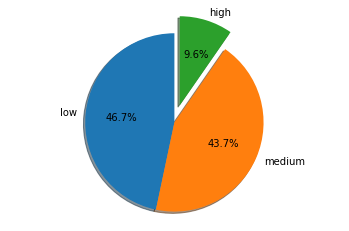

распределение сотрудников по зарплатам в департаменте hr
low 335
medium 359
high 45


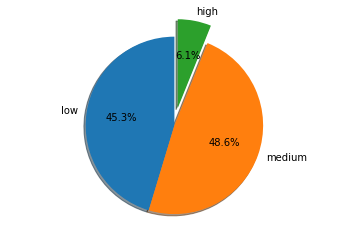

распределение сотрудников по зарплатам в департаменте technical
low 1372
medium 1147
high 201


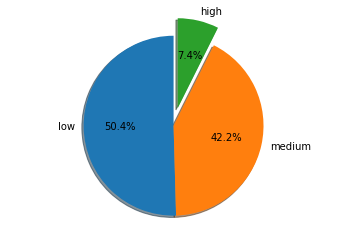

распределение сотрудников по зарплатам в департаменте support
low 1146
medium 942
high 141


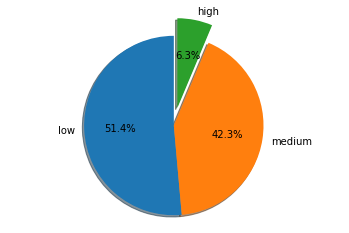

распределение сотрудников по зарплатам в департаменте management
low 180
medium 225
high 225


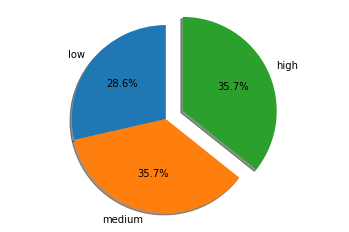

распределение сотрудников по зарплатам в департаменте IT
low 609
medium 535
high 83


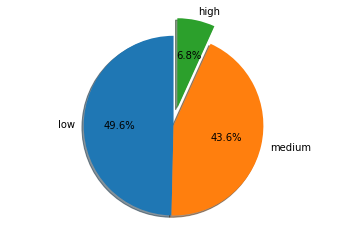

распределение сотрудников по зарплатам в департаменте product_mng
low 451
medium 383
high 68


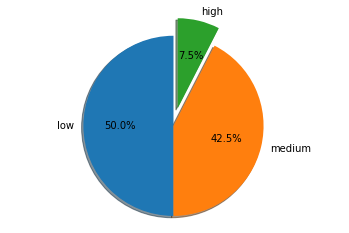

распределение сотрудников по зарплатам в департаменте marketing
low 402
medium 376
high 80


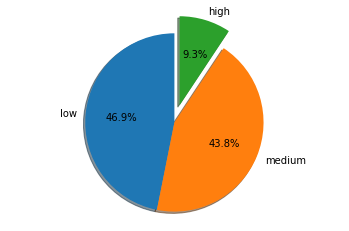

распределение сотрудников по зарплатам в департаменте RandD
low 364
medium 372
high 51


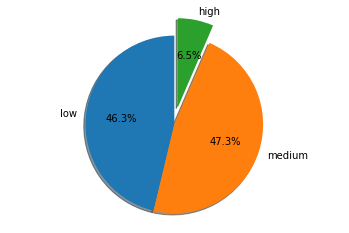

In [112]:
for dep in depart:
    list_=[]
    print('распределение сотрудников по зарплатам в департаменте',dep)
    depp = data[data['sales'] == dep]
    for sal in ['low', 'medium', 'high']:
        sall = depp[depp['salary'] == sal]
        print(sal,len(sall))
        list_.append(len(sall))
    labels = 'low', 'medium', 'high'
    sizes = list_
    explode = (0, 0, 0.2)  # only "explode" the 2nd slice (i.e. 'Hogs')
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
    ax1.axis('equal')      # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

**Характерно - в депертаменте 'management'  35.7% сотрудников** получают зарплату высокого уровня. Во всех других департементах такая зарплата не более, чем у 10% сотрудников. Производительность и вклад департаментов в общее дело оценить по имеющимся данным не удалось, к сож.

# 9. Сколько сотрудников покинули компанию

In [126]:
sum(data['left']==1)

3571

Из компании уволилось  3571 сотрудников

# 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

**1. Уровень удовлетворенности сотрудником работой в компании (satisfaction_level)**

t-test используют для определения, насколько среднее исследуемых данных статистически отличается от среднего значения генеральной совокупности.
Исследуем данные: X =data[data['left']==1]['satisfaction_level'].
Генеральная совокупность: Y = data['satisfaction_level'].
Рассматривая две выборки 𝑋 и Y , мы хотим сравнить их средние значения. Тогда рассматривается нулевая гипотеза о том, что выборочные средние значения равны (𝐻0: 𝜇X = 𝜇Y) и альтернативная о том, что выборочные средние различны (𝐻1 :𝜇X ≠ 𝜇Y).

In [161]:
left_satisfac = data[data['left']== 1]['satisfaction_level']
stats.ttest_1samp(left_satisfac, data['satisfaction_level'].mean())


Ttest_1sampResult(statistic=-39.10948894348446, pvalue=9.012781195378076e-279)

t-значение равно -39.1, и в одновыборочном критерии мы оцениваем p-value.
p-value равно 9e-279, что намного меньше стандартной альфа ошибки 0.05, поэтому мы отвергаем нулевую гипотезу о том, что средние значения идентичны. И можем сказать, что имеется статистическое различие между мнением сотрудников 'left'=1 по вопросу 'satisfaction_level' и генеральной совокупности 'satisfaction_level' в целом.
Если мы построим график вероятности выборки и генеральной совокупности, то можно убедиться, что это действительно так - плотности распределения не совпадают.
Таким образом, одна из причин увольнения сотрудников - **низкий уровень удовлетворенности компанией**.

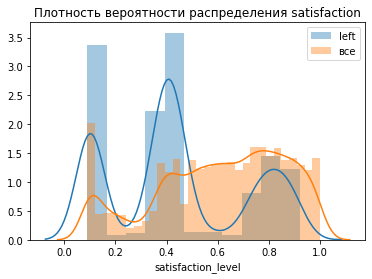

In [160]:
left_satisfac = data[data['left']== 1]['satisfaction_level']
satisfaction = data['satisfaction_level']
sns.distplot(left_satisfac)
sns.distplot(satisfaction)
plt.title('Плотность вероятности распределения satisfaction')
plt.legend(['left', 'все'])
plt.show()

**2. Оценка времени, которое сотрудник проводит на работе (средне месячное время) (average montly hours)**

Судя по результатам t-теста среднее генеральной совокупности перемееной 'average_montly_hours' также не сооветствует среденей выборки data[data['left']==1]['average_montly_hours']

In [154]:
left_average = data[data['left']== 1]['average_montly_hours']
stats.ttest_1samp(left_average, data['average_montly_hours'].mean())

Ttest_1sampResult(statistic=6.218506380185923, pvalue=5.598760530139529e-10)

t-значение равно 6.2, и в одновыборочном критерии мы оцениваем p-value.
p-value равно 5.5e-10, что намного меньше стандартной альфа ошибки 0.05, поэтому мы отвергаем нулевую гипотезу о том, что средние значения идентичны. И можем сказать, что имеется статистическое различие между мнением сотрудников 'left'=1 по вопросу 'average_montly_hours' и генеральной совокупности 'average_montly_hours' в целом.
Если мы построим график вероятности выборки и генеральной совокупности, то можно убедиться, что это действительно так - плотности распределения различаются.
Таким образом, вторая причина увольнения сотрудников - **сотруднику приходится проводить слишком много времени на работе**.

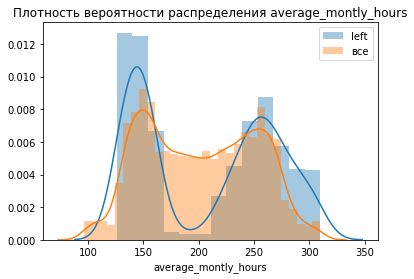

In [162]:
average_montly_hours = data['average_montly_hours']
sns.distplot(left_average)
sns.distplot(average_montly_hours)
plt.title('Плотность вероятности распределения average_montly_hours')
plt.legend(['left', 'все'])
plt.show()

**3. Количество проектов (number_project)**

In [163]:
left_number = data[data['left']== 1]['number_project']
stats.ttest_1samp(left_number, data['number_project'].mean())

Ttest_1sampResult(statistic=1.7238512080602715, pvalue=0.08482128282514263)

t-значение равно 1.72, и в одновыборочном критерии мы оцениваем p-value.
p-value равно 0.08, что больше стандартной альфа ошибки 0.05, поэтому мы не можем отвергнуть нулевую гипотезу о том, что среднее значения идентичны. И можем сказать, что не имеется статистическое различие между выборкой и генеральной совокупностью в целом.
Следовательно, **увольнение - сотрудники не связывают с числом проектов** компании.